# ML: Assignment 3

## Libraries

### Installs & External

In [1]:
# !pip install tensorflow-macos nltk

### Imports

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.data_loading import DataLoader
from src.data_processing import Process

from src.next_word_model import NextWordModel

from src.prediction_evaluation import Evaluator

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tilmankerl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pipeline

### Data Loading & Processing

In [4]:
dl = DataLoader()
process = Process(
    dl,
    sample_factor = 0.85
)

In [5]:
X_train, X_test, y_train, y_test = process.process()

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/data_processing.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["hasLink"] = df.text.str.contains(url_regex)


[Errno 2] No such file or directory: '/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/_objects/data.pkl'
No preprocessed file to load - <force> will be ignored.


### Model Init & Training

In [6]:
model = NextWordModel(
    processor=process,
    load_existing=True
)

Loading existing model successful!


In [7]:
# model.train(X_train, y_train, epochs = 100)

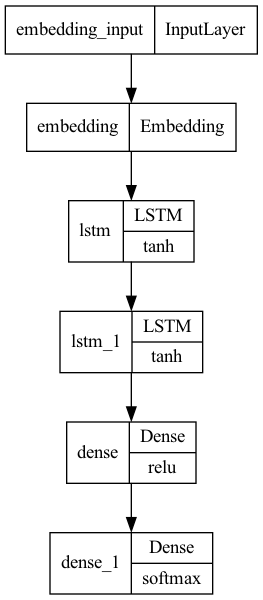

In [8]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


### Model Evaluation

In [9]:
pred = model.predict("america")
print(pred)

2023-02-19 15:41:17.998665: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


great


In [10]:
ev = Evaluator(model)

In [11]:
len(X_test)

12207

In [12]:
X_test = X_test[0:2500]
y_test = y_test[0:2500]

In [13]:
ev.evaluate(X_test, y_test, eval_type="id")

ERRORS:  4415
Accuracy: 1.37%


1.37

In [14]:
ev.evaluate(X_test, y_test, eval_type="lemma")

Accuracy: 1.37%


1.37

In [15]:
acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding")

Accuracy: 42.17%


(array([0.0178943 , 0.        , 0.        , 0.        , 0.        ,
        0.01789429, 0.04473572, 0.00894716, 0.04473572, 0.02684143,
        0.07157726, 0.05368286, 0.04473572, 0.12526001, 0.09841874,
        0.14315429, 0.19683715, 0.21473179, 0.35788515, 0.259468  ,
        0.42051574, 0.51893431, 0.51893431, 0.52788146, 0.55472289,
        0.77840147, 0.94840028, 0.84103147, 1.08260434, 0.67998289,
        0.97523862, 0.94839719, 1.25260006, 1.35997021, 1.3420715 ,
        1.41364864, 1.72679866, 1.92363581, 1.61943294, 1.61943294,
        1.72680428, 1.77153438, 1.75364009, 1.51206722, 1.85205867,
        2.2725744 , 2.04890249, 2.33519681, 3.10466884, 2.70202849,
        2.57678566, 2.63941587, 2.7109756 , 2.14732139, 2.19204298,
        2.22784594, 2.87202366, 2.0131138 , 2.12942704, 1.8252113 ,
        1.77154014, 1.68205747, 1.48523063, 1.60153344, 2.15626856,
        1.89680056, 1.7625815 , 1.30628718, 1.46732673, 1.61943821,
        1.66416324, 1.28839283, 1.50312497, 1.44

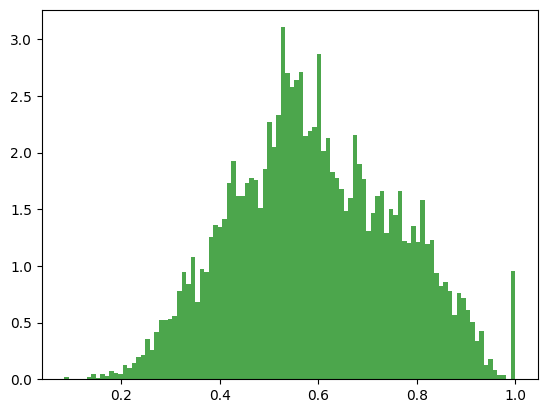

In [16]:
num_bins = 100
plt.hist(
    list(scores), 
    num_bins, 
    density = 1, 
    color ='green',
    alpha = 0.7
)

In [17]:
acc_list = []

for threshold in range(2, 10, 1):
    t = threshold/10
    acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding", threshold=t)
    acc_list.append({
        "accuracy": acc,
        "threshold": t
    })

Accuracy: 156.22%
Accuracy: 151.75%
Accuracy: 137.09%
Accuracy: 110.31%
Accuracy: 71.16%
Accuracy: 42.17%
Accuracy: 19.830000000000002%
Accuracy: 4.7%


<AxesSubplot: xlabel='threshold'>

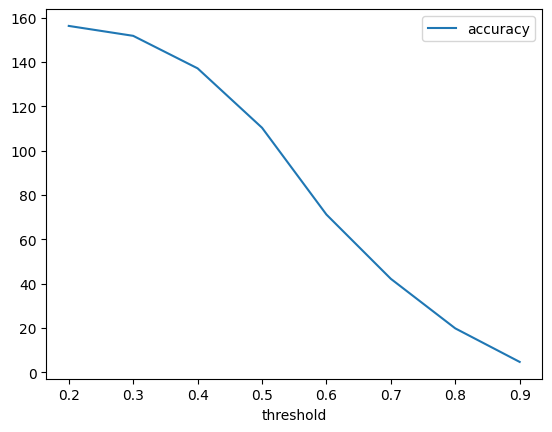

In [19]:
acc_emb_df = pd.DataFrame(acc_list)
acc_emb_df.plot(
    x = "threshold",
    y = "accuracy"
)